In [75]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [76]:
import json
import os

api_token = {
    "username": "sidra36",
    "key": "a05f875adc9fe0a47d81cad0596378cb"
}

In [77]:
# Create ~/.kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

In [78]:
# Write kaggle.json
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    json.dump(api_token, f)

In [79]:
# Set permissions to 600
os.chmod(kaggle_json_path, 0o600)

In [80]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install --user kaggle

Looking in links: /usr/share/pip-wheels


In [81]:
# Add user's local bin to PATH so Jupyter can see the CLI tool
os.environ['PATH'] += os.pathsep + os.path.expanduser("~/.local/bin")

In [82]:
!kaggle datasets download -d mohammadtalib786/retail-sales-dataset
!unzip -o retail-sales-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset
License(s): CC0-1.0
retail-sales-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  retail-sales-dataset.zip
  inflating: retail_sales_dataset.csv  


In [83]:
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data=pd.read_csv(r'retail_sales_dataset.csv',encoding='latin1')

In [85]:
df=data.copy()

In [86]:
df.shape

(1000, 9)

In [87]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [88]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [89]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(8)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [91]:
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Duplications

In [92]:
print(df.duplicated().sum())

0


## Feature Extracton

In [93]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head(8)

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,day,month,year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,24,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,27,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,13,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,21,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,6,5,2023
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,25,4,2023
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,13,3,2023
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,22,2,2023


## Outliers Detection and Handling

There are various techniques we can apply, but I will focus on the logarithmic transformation technique, which is used to reduce the impact of outliers.

In [94]:
import statistics 
def find_anomalies(df): 
    anomalies=[]
    df_std=statistics.stdev(df) 
    df_mean=statistics.mean(df)

    normal_range=df_std*3
    lower_limit=df_mean-normal_range
    upper_limit=df_mean+normal_range

    for outlier in df:
        if outlier<lower_limit or outlier> upper_limit:
            anomalies.append(outlier)

    return anomalies

In [95]:
df.age

0      34
1      26
2      50
3      37
4      30
       ..
995    62
996    52
997    23
998    36
999    47
Name: age, Length: 1000, dtype: int64

In [96]:
(df['age'] < 0).sum()

0

In [97]:
list_1=find_anomalies(df.age) 

In [98]:
len(list_1)

0

## Trends, Patterns And Correlations

In [99]:
(df['quantity'] < 0).sum()

0

In [100]:
(df['price_per_unit'] < 0).sum()

0

## Univariate Analysis

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

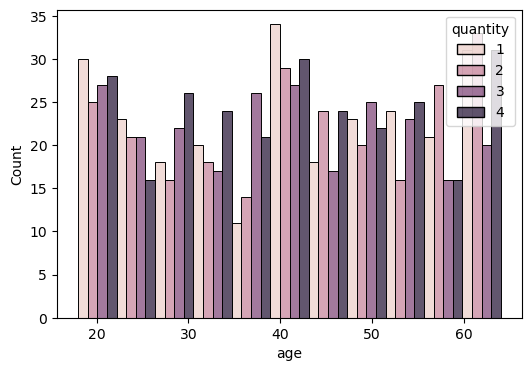

In [101]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='age',hue='quantity',stat='count',multiple='dodge')

## Bivariate Analysis

### Numeric vs Numeric

In [102]:
monthly_sales = df.groupby('month')['total_amount'].sum()
monthly_sales

month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: total_amount, dtype: int64

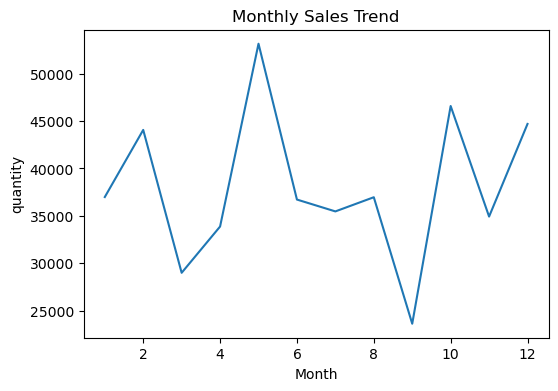

In [103]:
plt.figure(figsize=(6,4))
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('quantity')
plt.show()

In [104]:
category_summary = df.groupby('product_category')['total_amount'].sum()
category_summary

product_category
Beauty         143515
Clothing       155580
Electronics    156905
Name: total_amount, dtype: int64

<Axes: xlabel='product_category', ylabel='total_amount'>

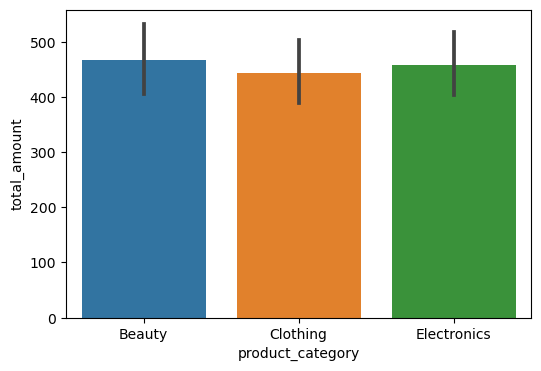

In [105]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='product_category', y='total_amount')

## MultiVariate Analysis

### Correlation

In [106]:
new_df= df[['day','age','quantity','price_per_unit']]

In [107]:
new_df.corr()

,day,age,quantity,price_per_unit
day,1.000000,0.041899,0.029650,0.018303
age,0.041899,1.000000,-0.023737,-0.038423
quantity,0.029650,-0.023737,1.000000,0.017501
price_per_unit,0.018303,-0.038423,0.017501,1.000000


<Axes: >

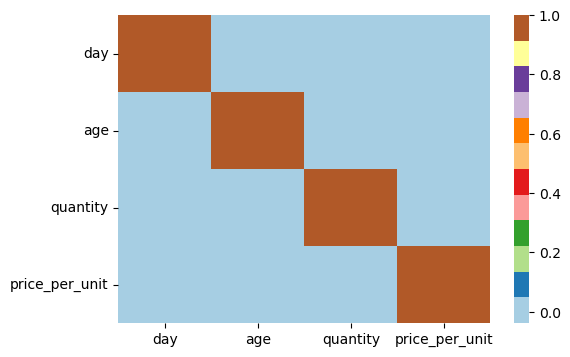

In [108]:
plt.figure(figsize=(6,4))
sns.heatmap(new_df.corr(),cmap='Paired')

In [109]:
df.to_csv('final_table.csv', index=False)